In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit, learning_curve

## Load dataset

In [26]:
devices = pd.read_csv("dataset.csv", delimiter=" ")
devices.head()

,device,max_iat,max_rtt,mean_iat,mean_rtt,median_iat,median_rtt,min_iat,min_rtt
0,0,0.000014,0.183980,0.000006,0.008211,0.000003,0.004000,0.000002,0.002662
1,0,0.000014,0.112005,0.000009,0.006274,0.000013,0.004000,0.000003,0.003973
2,0,0.000019,0.123997,0.000011,0.006267,0.000013,0.003999,0.000002,0.003971
3,0,0.000014,0.124003,0.000010,0.006383,0.000013,0.003999,0.000003,0.003956
4,0,0.000019,0.119981,0.000011,0.006143,0.000013,0.003999,0.000002,0.003958


## Split dataset into data and labels

In [27]:
X = devices.iloc[:, 1:9]
y = devices.select_dtypes(include=[int])

## Make polynomial features

In [28]:
poly = PolynomialFeatures(2)
X = poly.fit_transform(X.values[:,:])

## Split dataset into train and test

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

## Scale data

In [30]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Train an MLP with softmax activation

In [31]:
mlp = MLPClassifier(hidden_layer_sizes=(15, 15, 15), max_iter=50000)
mlp.out_activation_ = 'softmax'
mlp.fit(X_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(15, 15, 15), max_iter=50000)

In [32]:
predictions = mlp.predict(X_test)

In [33]:
print(confusion_matrix(y_test,predictions))

[[19  0  7  0  0  0  0  1  0  0  1  0  0  0]
 [ 0 15  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0 17  0  0  0  1  1  0  0  0  0  0  0]
 [ 0  0  0 14  1  0  0  1  2  0  0  0  2  0]
 [ 0  0  0  0 24  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0 21  2  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  3  9  1  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0 16  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  8  0  0  0  7  0]
 [ 1  0  0  0  0  0  0  0  0 25  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 13  2  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  1 13  0  1]
 [ 0  0  0  0  0  0  0  0  7  0  0  0 19  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  2  0 15]]


In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.90      0.68      0.78        28
           1       1.00      1.00      1.00        15
           2       0.68      0.85      0.76        20
           3       1.00      0.70      0.82        20
           4       0.89      1.00      0.94        24
           5       0.78      0.84      0.81        25
           6       0.75      0.69      0.72        13
           7       0.80      0.89      0.84        18
           8       0.47      0.53      0.50        15
           9       1.00      0.96      0.98        26
          10       0.81      0.87      0.84        15
          11       0.76      0.76      0.76        17
          12       0.68      0.73      0.70        26
          13       0.94      0.83      0.88        18

    accuracy                           0.81       280
   macro avg       0.82      0.81      0.81       280
weighted avg       0.83      0.81      0.82       280



In [35]:
def plot_learning_curve(classifier, title, X, y, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure()
    plt.title(title, fontsize=20, fontweight='bold')

    # X axis
    plt.xlabel("Training examples", fontsize=16, fontweight='bold')
    plt.xticks(fontsize=14)

    # Y axis
    plt.ylabel("F1-Score", fontsize=16, fontweight='bold')
    plt.yticks(np.arange(0, 1.1, step=0.1), fontsize=14)
    plt.ylim(0, 1.1)

    train_sizes, train_scores, test_scores = learning_curve(classifier, X, y, cv=StratifiedShuffleSplit(n_splits=10),
                                                            train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best", fontsize=16)

    plt.grid()
    plt.savefig('{}.png'.format(title))
    print("Learning curves for {} saved at {}.png".format(title, title))



Learning curves for MLP saved at MLP.png


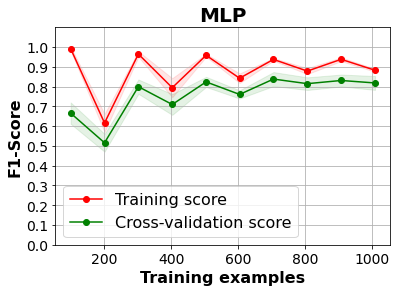

In [36]:
plot_learning_curve(mlp, "MLP", X_train, y_train.values.ravel())